## Projeto 8 Camada Fisica da Computação

### Lado do Emissor do codigo:

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.ticker as ticker
import sounddevice as sd
import soundfile as sf
from scipy.signal import butter, filtfilt
from IPython.display import Audio
from scipy.signal import cheby2, ellip, filtfilt,freqz



In [148]:
def passa_baixa(sinal,fc,fs,ordem):
    #projeta um filtro digital do tipo butterworth
    b_lp, a_lp = butter(N=ordem, Wn=fc/(fs/2), btype='low')
    y = filtfilt(b_lp,a_lp,sinal)

    w, h = freqz(b_lp, a_lp, worN=2048, fs=fs)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 1, 1)
    plt.plot(w, 20 * np.log10(np.abs(h)))
    plt.axvline(fc, color='red', linestyle='--', label=f'fc = {fc/1000:.1f} kHz')
    plt.title("Bode (Magnitude) do Filtro Passa-Baixas")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Ganho (dB)")
    plt.ylim(-80, 5)
    plt.xlim(0, fs/2)
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return y

In [149]:
def calcula_crescente(magnitude:np.array, freqs:np.array,n:int=2):
    #precisa fazer uma copia pois está salvo no mesmo bloco de memoria, fazendo com que o resultado seja alterado
    magnitude = magnitude.copy()
    #magnitude é o array que contém todos os pontos com as magnitudes identificadas pela fft
    #n é o numero de senoides 

    dic = {}
    i = 0
    while i < n:
        index = np.argmax(magnitude)
        print(index)
        maior = magnitude[index]
        dic[freqs[index]] = maior
        magnitude[index] = 0
        i+=1
        
    return dic

In [150]:
def plot_fft(sinal, fs):
    """
    Plota o gráfico da Transformada de Fourier (FFT) de um sinal.

    Parâmetros:
    - sinal: lista ou array com os valores do sinal no tempo
    - fs: taxa de amostragem em Hz
    """
    # Converter sinal para array NumPy
    sinal = np.array(sinal)
    
    # Número de amostras e vetor de tempo
    N = len(sinal)
    t = np.arange(N) / fs

    # FFT e cálculo da magnitude
    fft_result = np.fft.fft(sinal)
    freqs = np.fft.fftfreq(N, d=1/fs)
    magnitude = np.abs(fft_result)

    # Manter só metade do espectro (frequências positivas)
    half_N = N // 2
    freqs = freqs[:half_N]
    magnitude = magnitude[:half_N]

    picos = calcula_crescente(magnitude=magnitude, freqs=freqs, n=2)
    picos_f = list(picos.keys())
    nulos = [0]*len(picos_f)


    
    continua=True
    if continua:

        # Plot do sinal no tempo (opcional)
        plt.figure(figsize=(12, 4))

        # Plot do espectro de frequência
        ax = plt.subplot(1, 1, 1)
        ax.stem(freqs, magnitude, basefmt=" ")
        ax.minorticks_on()
        ax.xaxis.set_minor_locator(ticker.FixedLocator(picos_f))
        # ax.set_xticks(picos_f, minor=True)
        ax.tick_params(axis="x",which="minor",length=8, color="black", bottom=True)
        plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")
        plt.title("Transformada de Fourier (FFT)")
        plt.xlabel("Frequência (Hz)")
        ax.legend()
        plt.ylabel("Magnitude")
        plt.grid(True)

In [151]:
""" 
#Gravando 3 arquivos de áudios:
gravar = True
#Função que grava e salva num arquivo um audio que está rodando. 
# A frequencia de amostras é de 44100, pelo fato de ser duas vezes mais do que ouvimos -> CORRETO?
def grava_e_salva(filename, duration=5, fs=44100, canais=1):

    # Grava audio do dispositivo padrão (microfone ou Stereo Mix)
    # e salva em um arquivo WAV.

    # filename: nome do arquivo de saída (.wav)
    # duration: duração em segundos
    # fs: taxa de amostragem em Hz
    # canais: número de canais (1=mono, 2=stereo)

    print(f"Iniciando gravação de {duration}s a {fs}Hz...")
    grava = sd.rec(int(duration * fs), samplerate=fs, channels=canais, dtype='float32')
    sd.wait()  # aguarda término da gravação
    print("Gravação concluída, salvando em:", filename)
    sf.write(filename, grava, fs)
    print("Arquivo salvo com sucesso!")

# Exemplo de uso:
if gravar:
    nomes = ['whatsoncewas2','heavenknowsimmisearablenow','wonderwall']
    for nome in nomes:
        grava_e_salva(filename=f"{nome}.wav", duration=20, fs=44100, canais=1)

    gravar = False

"""

' \n#Gravando 3 arquivos de áudios:\ngravar = True\n#Função que grava e salva num arquivo um audio que está rodando. \n# A frequencia de amostras é de 44100, pelo fato de ser duas vezes mais do que ouvimos -> CORRETO?\ndef grava_e_salva(filename, duration=5, fs=44100, canais=1):\n\n    # Grava audio do dispositivo padrão (microfone ou Stereo Mix)\n    # e salva em um arquivo WAV.\n\n    # filename: nome do arquivo de saída (.wav)\n    # duration: duração em segundos\n    # fs: taxa de amostragem em Hz\n    # canais: número de canais (1=mono, 2=stereo)\n\n    print(f"Iniciando gravação de {duration}s a {fs}Hz...")\n    grava = sd.rec(int(duration * fs), samplerate=fs, channels=canais, dtype=\'float32\')\n    sd.wait()  # aguarda término da gravação\n    print("Gravação concluída, salvando em:", filename)\n    sf.write(filename, grava, fs)\n    print("Arquivo salvo com sucesso!")\n\n# Exemplo de uso:\nif gravar:\n    nomes = [\'whatsoncewas2\',\'heavenknowsimmisearablenow\',\'wonderwall\

28799
28798


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(1000.0, 5000.0)

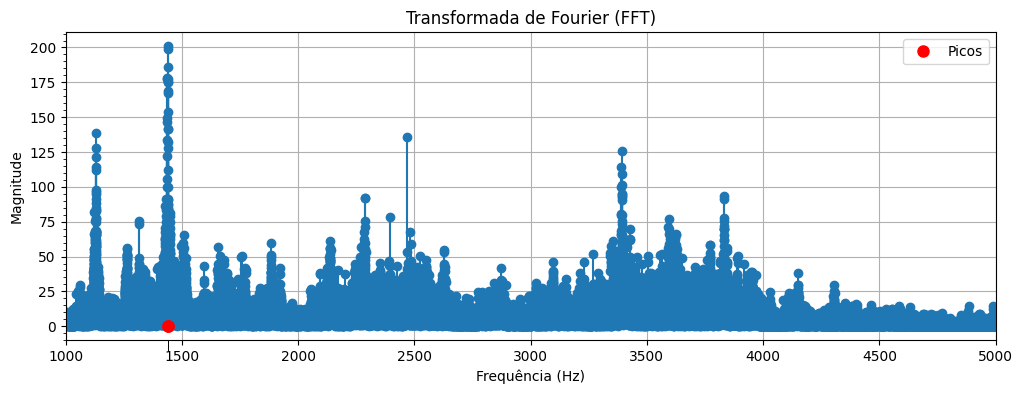

In [152]:
#plotando fft da música
what_once_was, fs = sf.read('whatoncewas.wav')
plot_fft(what_once_was, fs)
plt.xlim(1000,5000)

In [153]:
#Faixa 1 :
#Como a diferença é de 3khz, então são 3/2 para cada lado, então será ideal uma frequencia que é 12-1.5 e 9+1.5, pois assim estará na faixa.

freq_portadora1 = 10.5e3
fs = 44100
N = len(what_once_was) #obtem-se quantos pontos terão na lista, pra uso da frequencia
t = np.arange(N)/fs #distribui os pontos ao longo da frequencia, então serão tantos pontos por freq de amostra
w = 2*np.pi*freq_portadora1
portadora_faixa1 = np.sin(w*t)


210000
209999


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


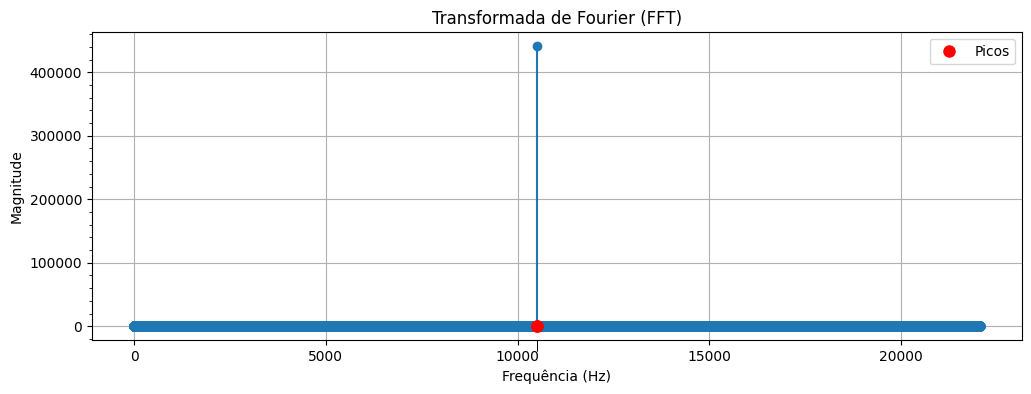

In [154]:
#Observando fft: 
plot_fft(portadora_faixa1,fs)

238799
181201


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(5000.0, 13000.0)

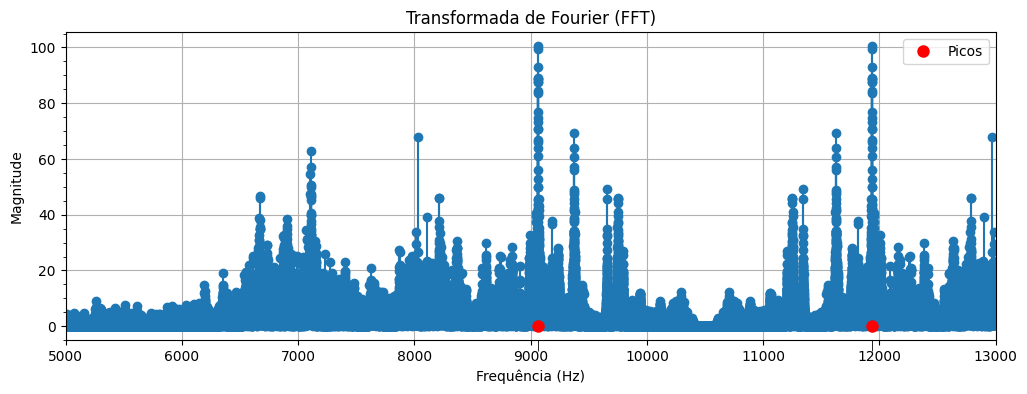

In [155]:
#modulação AM: Multiplicação de ondas.
modulacao1 = what_once_was * portadora_faixa1
plot_fft(modulacao1,fs)
plt.xlim(5000,13000)

Conclusões: Como na faixa da musica `What once was` o maior pico é `exatamente` em 15khz, então, não atrapalha a banda, pois justamente é a média entre os extremos. É uma situação muito atipica, e coincidente, dei muita sorte. 

51392
44073


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(1000.0, 5000.0)

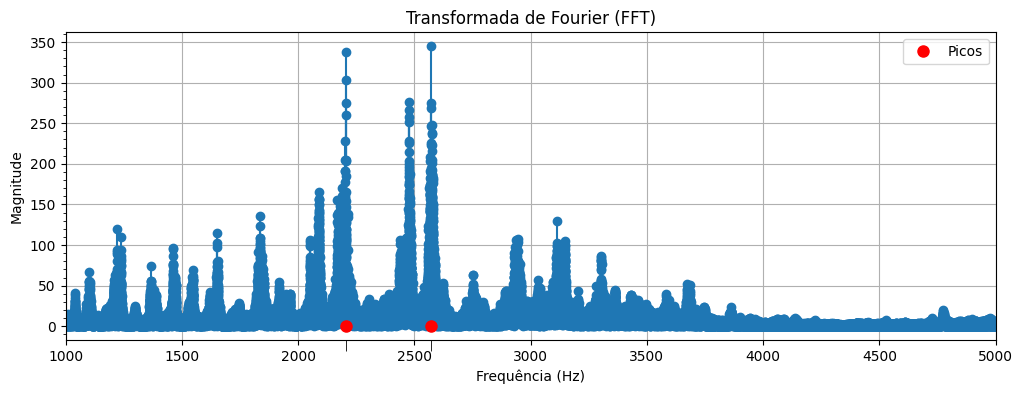

In [156]:
#faixa 2:
heavenknowimmiserablenow, fs = sf.read("heavenknowsimmisearablenow.wav")
plot_fft(heavenknowimmiserablenow,fs) 
plt.xlim(1000,5000)

Como podemos ver, está entre 2300 e 2700 e a media não fica exatamente em 1500, então isso alterará o valor da faixa, prejudicando o projeto. Por isso, precisamos `filtra-lo` com um `passa baixa` para que passe apenas frequencias abaixo ou iguais a 1.5khz 

In [157]:
#Criando segunda portadora: 
freq_portadora2 = 13.5e3
N = len(heavenknowimmiserablenow)
t = np.arange(N)/fs #definição do periodo: O tempo vai representar quantos blocos de amostras terei no total
w = np.pi*2*freq_portadora2
portadora_faixa2 = np.sin(w*t)

270000
397761


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


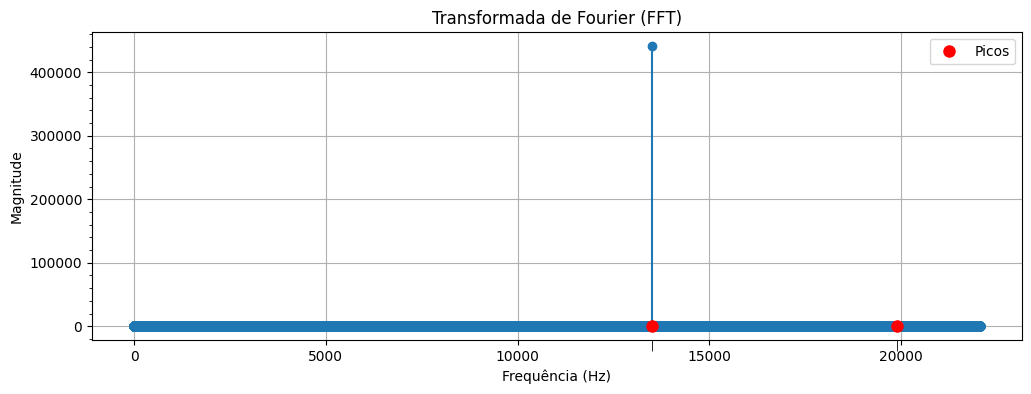

In [158]:
#plotando fft da segunda onda: 
plot_fft(portadora_faixa2,fs)

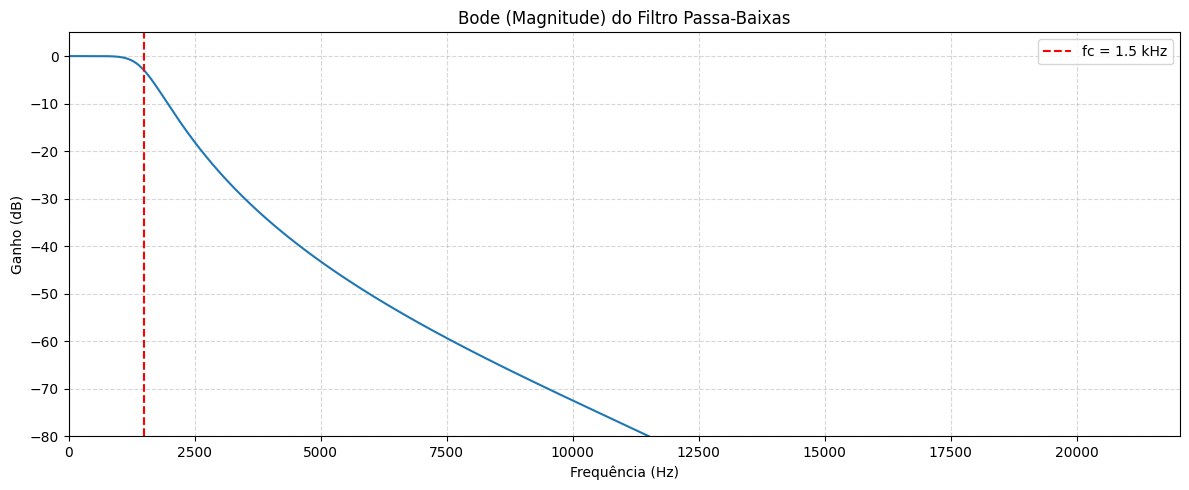

14626
14723


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(0.0, 2500.0)

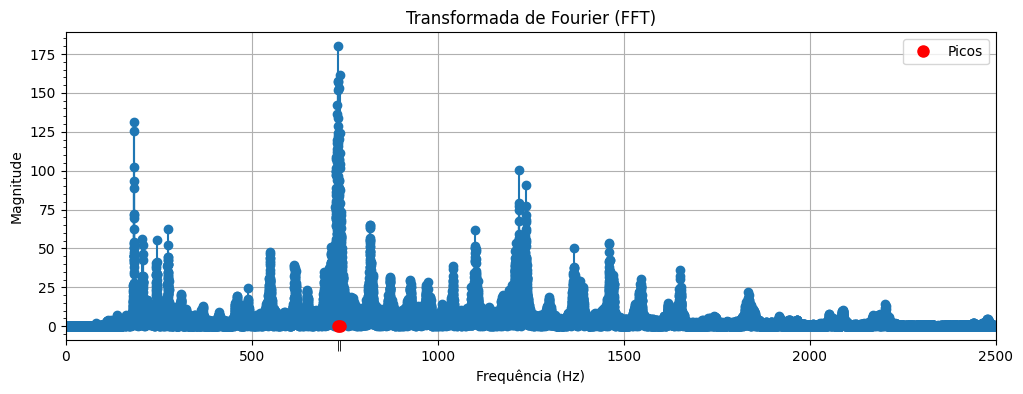

In [166]:
#Passa baixa do sinal para que não atrapalhe a faixa:
heavenknowimmiserablenow_filtrado = passa_baixa(sinal=heavenknowimmiserablenow,fc=1.5e3,fs=fs,ordem=4)

#plot fft musica filtrada no passsa-baixa:
plot_fft(heavenknowimmiserablenow_filtrado,fs)
plt.xlim(0,2500)

284626
255374


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(9000.0, 15000.0)

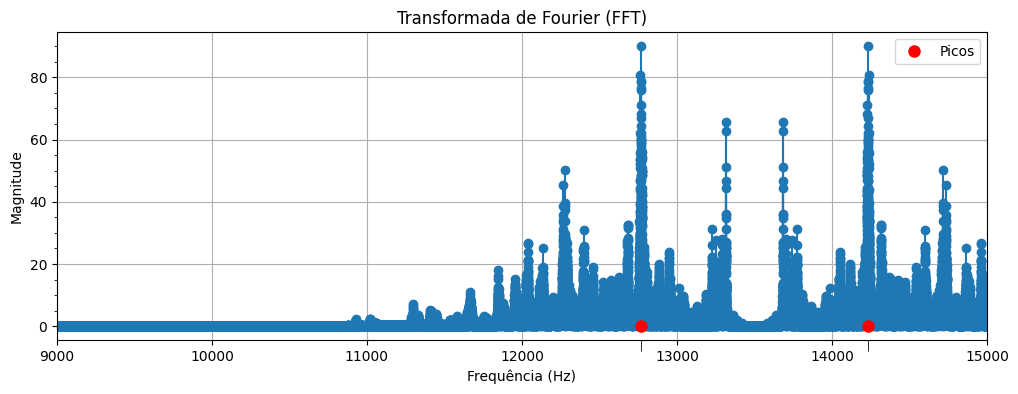

In [160]:
#Modulando AM segundo sinal: 
modulacao2 = heavenknowimmiserablenow_filtrado*portadora_faixa2
plot_fft(modulacao2,fs)
plt.xlim(9000,15000)

Agora o sinal está ajustado e nas faixas das quais estamos buscando.

35330
35326


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(0.0, 2000.0)

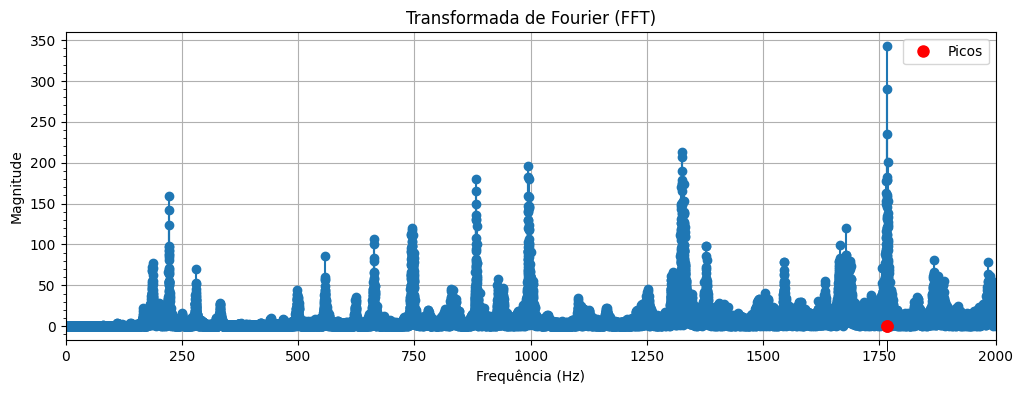

In [161]:
#Faixa 3:
wonderwall, fs = sf.read("wonderwall.wav")
plot_fft(wonderwall,fs=fs)
plt.xlim(0,2000)


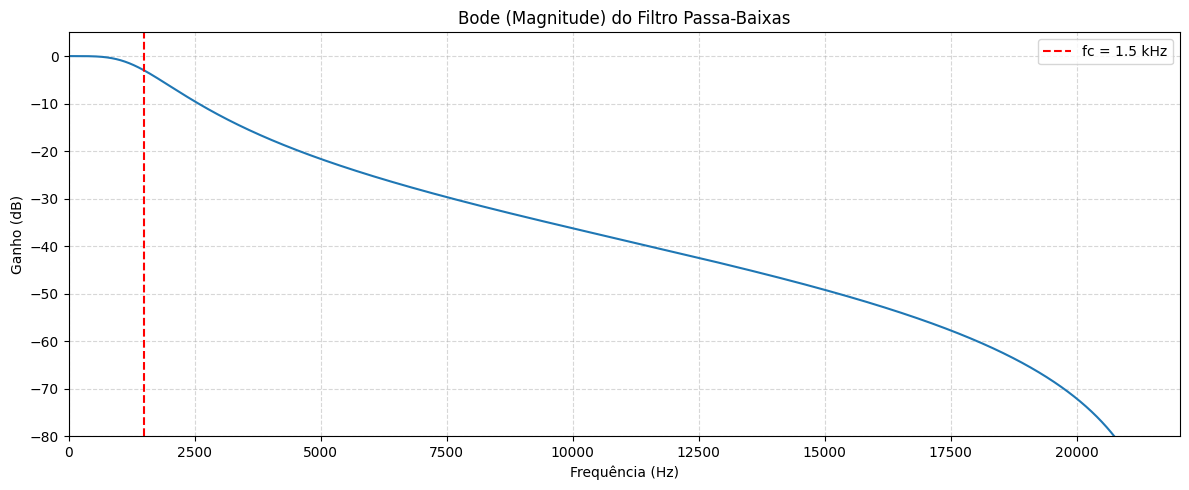

19898
17656


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(0.0, 4000.0)

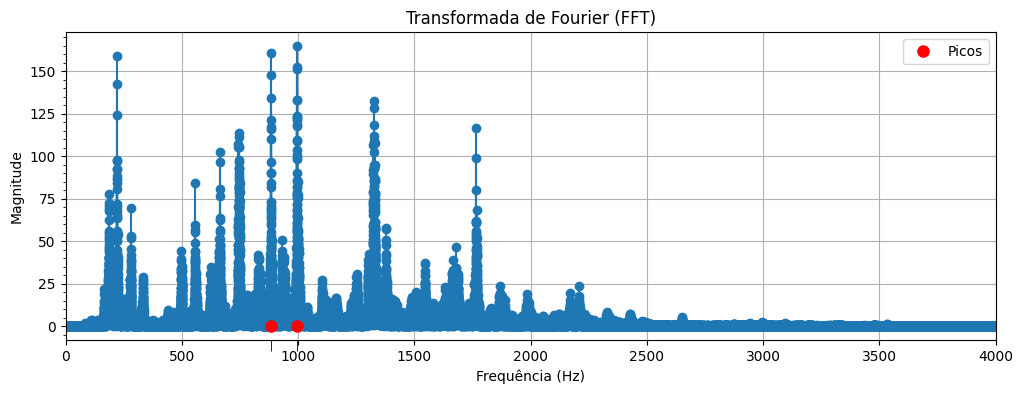

In [162]:
#Filtrando o sinal para estar em 1500 de frequencia, para que nao atrapalhe na banda
wonderwall_filtrado = passa_baixa(wonderwall,fc=1.5e3,fs=fs,ordem=2)
plot_fft(wonderwall_filtrado,fs)
plt.xlim(0,4000)

330000
229708


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


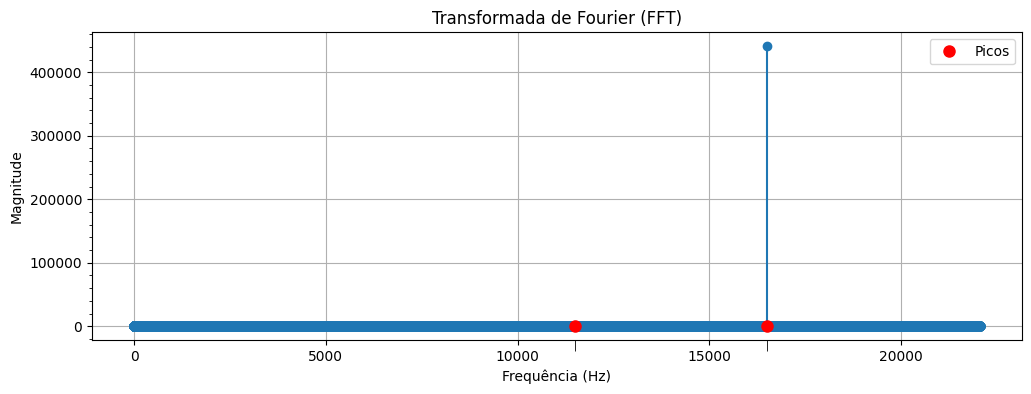

In [163]:
#Criando portadora 3 :
freq_portadora3 = 16.5e3
N = len(wonderwall)
t = np.arange(N)/fs
w = 2*np.pi*freq_portadora3
portadora_faixa3 = np.sin(w*t)

#FFT portadora 3
plot_fft(portadora_faixa3,fs)


310102
349898


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(14000.0, 18500.0)

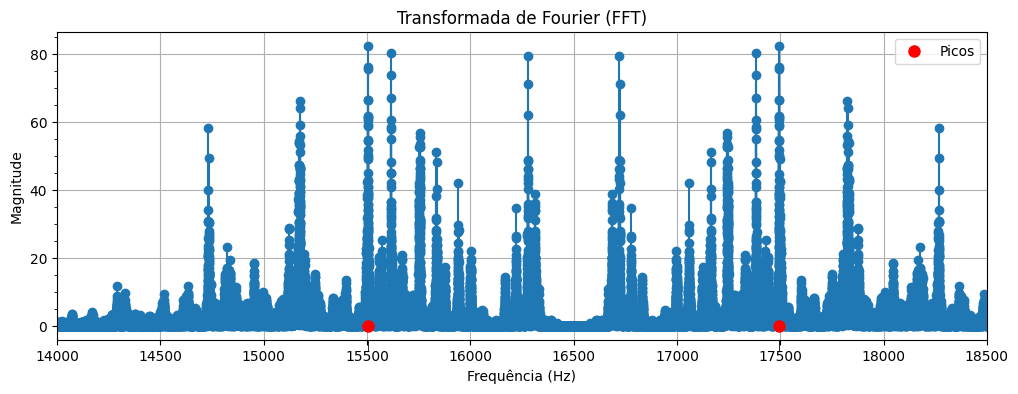

In [164]:
modulacao3= wonderwall_filtrado*portadora_faixa3
plot_fft(modulacao3,fs)
plt.xlim(14000,18500)

Para que ficasse adequado a banda, tivemos que fazer algumas mudanças, para que ficasse dentro da banda, aumentei muito a frequencia da portadora, para que ao modulada com a frequencia da musica, ela ficasse dnetor da banda que nos interessa, como o grafico acima nos mostra. 

238799
181201


C:\Users\Patricia\AppData\Local\Temp\ipykernel_31492\1971481245.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


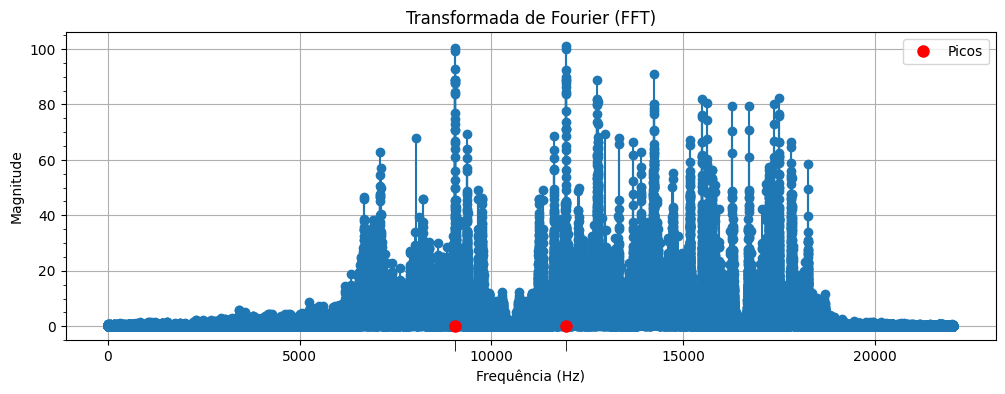

In [170]:
soma_tres = modulacao1+modulacao2+modulacao3
plot_fft(soma_tres,fs)

Esse é o gráfico que contem todas as frequencias dos sinais modulados, então, conseguimos extrai-los por meio de filtros passa faixa.